In [2]:
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '.jp-Notebook { padding-left: 0% !important; padding-right: 0% !important; width:100% !important; } '
    '</style>'
))

/tmp/ipykernel_516752/3841302045.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
import pandas as pd
import numpy as np
import os
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget

matplotlib.style.use("bmh")
font = {'size': 13}
matplotlib.rc('font', **font)

from IPython.display import display

In [3]:
%load_ext autoreload
%autoreload 2
    
import transform

In [14]:
# COLLECT_TS = "2024-05-16T17:23:31.600863496+00:00"
COLLECT_TS = "2024-05-19T13:08:15.671530744+00:00"
PATH = "figures/redis"
FIGSIZE=(3.2, 3)
os.makedirs(PATH, exist_ok=True)

In [5]:
def legend_filter_lines(leg, lines, fig):
    map_legend_to_ax = {}
    for legend_line, ax_line in zip(leg.get_lines(), lines):
        legend_line.set_picker(5)  # Enable picking on the legend line.
        map_legend_to_ax[legend_line] = ax_line

    def on_pick(event):
        # On the pick event, find the original line corresponding to the legend
        # proxy line, and toggle its visibility.
        legend_line = event.artist
        print(legend_line)
    
        # Do nothing if the source of the event is not a legend line.
        if legend_line not in map_legend_to_ax:
            return
    
        ax_line = map_legend_to_ax[legend_line]
        visible = not ax_line.get_visible()
        ax_line.set_visible(visible)
        # Change the alpha on the line in the legend, so we can see what lines
        # have been toggled.
        legend_line.set_alpha(1.0 if visible else 0.2)
        fig.canvas.draw()
    
    # leg.set_draggable(True)
    fig.canvas.mpl_connect('pick_event', on_pick)

# Response Time

In [6]:
percentiles = pd.read_csv(f"../data/{COLLECT_TS}/application-metrics/memtier_percentiles_95.csv")
percentiles

,epoch_s,response_time_us
0,1716124117,1511
1,1716124118,33535
2,1716124119,73727
3,1716124120,74239
4,1716124121,78335
...,...,...
316,1716124433,9151
317,1716124434,6943
318,1716124435,8511
319,1716124436,6559


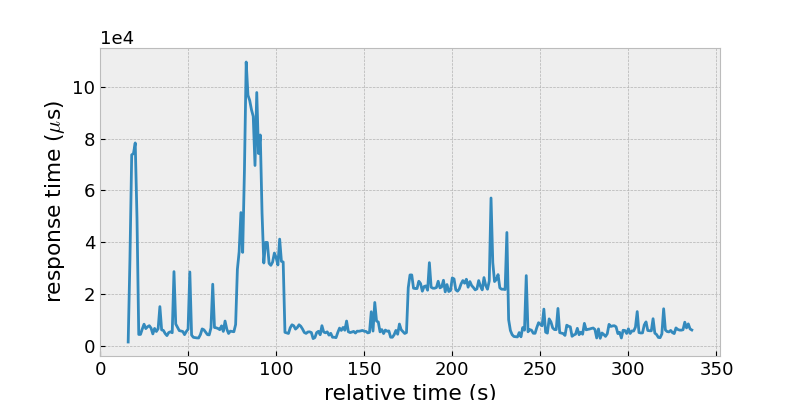

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(percentiles["epoch_s"] - 1716124101, percentiles["response_time_us"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.xlabel("relative time (s)")
plt.ylabel("response time ($\mu$s)")
plt.savefig("full_response_time.pdf")
plt.show()

# Metrics

In [8]:
metric_files = transform.recursive_dfs(f"../data/{COLLECT_TS}/system-metrics/redis-server")
metric_files = list(filter(lambda s: 'sched/' in s, metric_files))
metric_files

['../data/2024-05-19T13:08:15.671530744+00:00/system-metrics/redis-server/24997/sched/1716076800000.csv',
 '../data/2024-05-19T13:08:15.671530744+00:00/system-metrics/redis-server/25000/sched/1716076800000.csv',
 '../data/2024-05-19T13:08:15.671530744+00:00/system-metrics/redis-server/24998/sched/1716076800000.csv',
 '../data/2024-05-19T13:08:15.671530744+00:00/system-metrics/redis-server/24999/sched/1716076800000.csv',
 '../data/2024-05-19T13:08:15.671530744+00:00/system-metrics/redis-server/24994/sched/1716076800000.csv',
 '../data/2024-05-19T13:08:15.671530744+00:00/system-metrics/redis-server/24996/sched/1716076800000.csv',
 '../data/2024-05-19T13:08:15.671530744+00:00/system-metrics/redis-server/36848/sched/1716076800000.csv']

In [9]:
metrics = transform.metric_files_to_df(metric_files)
metrics

,epoch_s,thread/redis-server/24997/sched/epoch_ms,thread/redis-server/24997/sched/runtime,thread/redis-server/24997/sched/rq_time,thread/redis-server/24997/sched/sleep_time,thread/redis-server/24997/sched/block_time,thread/redis-server/24997/sched/iowait_time,thread/redis-server/25000/sched/epoch_ms,thread/redis-server/25000/sched/runtime,thread/redis-server/25000/sched/rq_time,...,thread/redis-server/24996/sched/runtime_rate,thread/redis-server/24996/sched/rq_time_rate,thread/redis-server/24996/sched/sleep_time_rate,thread/redis-server/24996/sched/block_time_rate,thread/redis-server/24996/sched/iowait_time_rate,thread/redis-server/36848/sched/runtime_rate,thread/redis-server/36848/sched/rq_time_rate,thread/redis-server/36848/sched/sleep_time_rate,thread/redis-server/36848/sched/block_time_rate,thread/redis-server/36848/sched/iowait_time_rate
0,1716124101,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1716124102,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1716124103,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1716124104,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1716124105,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1716124437,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
319,1716124438,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
320,1716124439,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
321,1716124440,1.716124e+12,0.107907,0.0,0.0,0.0,0.0,1.716124e+12,0.029652,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [10]:
metrics = pd.merge(metrics, percentiles, on="epoch_s", how="outer")

In [11]:
# LIMITS = (0, 310)
LIMITS = (50, 120)
# LIMITS = (150, 280)

col_filter = metrics.filter(
    regex="("
              "_rate|"
              "response_time_us|"
              "epoch_s"
          ")"
).columns

col_filter = col_filter[~col_filter.str.contains("sleep_time_rate", regex=False)]
related = metrics.loc[LIMITS[0]:LIMITS[1], col_filter]
corr = related.corr(method="spearman")["response_time_us"].sort_values(ascending=False, key=abs)
corr

response_time_us                                    1.000000
thread/redis-server/24994/sched/rq_time_rate        0.622381
thread/redis-server/36848/sched/runtime_rate       -0.500000
thread/redis-server/36848/sched/rq_time_rate        0.500000
thread/redis-server/36848/sched/block_time_rate    -0.428571
thread/redis-server/24994/sched/runtime_rate        0.146205
thread/redis-server/24999/sched/runtime_rate        0.114056
epoch_s                                            -0.089962
thread/redis-server/24994/sched/block_time_rate     0.040828
thread/redis-server/24997/sched/runtime_rate             NaN
thread/redis-server/24997/sched/rq_time_rate             NaN
thread/redis-server/24997/sched/block_time_rate          NaN
thread/redis-server/24997/sched/iowait_time_rate         NaN
thread/redis-server/25000/sched/runtime_rate             NaN
thread/redis-server/25000/sched/rq_time_rate             NaN
thread/redis-server/25000/sched/block_time_rate          NaN
thread/redis-server/2500

In [12]:
import re

bar = corr[(corr.isna() == False) & (~corr.index.str.contains("response_time_us|epoch_s", regex=True))]

metrics_view = related.loc[related["epoch_s"].isna() == False, bar.index.union(["epoch_s", "response_time_us"])]
metrics_view = metrics_view.sort_values(by="epoch_s")
metrics_view = metrics_view.loc[LIMITS[0]:LIMITS[1], :]
metrics_view["relative_epoch_s"] = metrics_view["epoch_s"] - metrics["epoch_s"].min()
metrics_view = metrics_view.loc[:, :]
Y = metrics_view.loc[:, ~metrics_view.columns.isin(["epoch_s", "relative_epoch_s", "response_time_us"])]

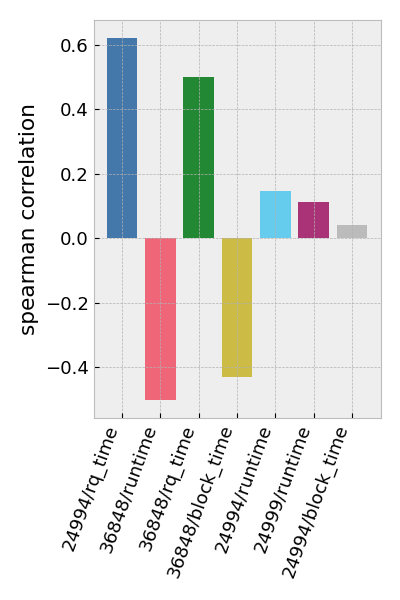

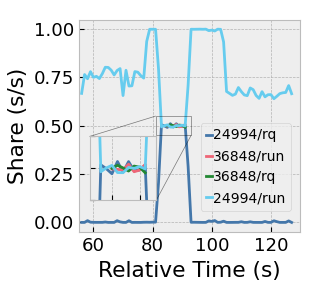

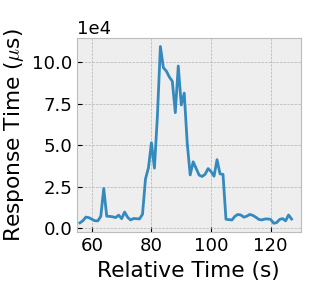

In [42]:
plt.close("all")

XLIM = [55, 130]

colours = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']

bar.index = [re.sub(r"thread/redis-server/(\d+)/sched/(.*)_rate$", r"\1/\2", col) for col in bar.index]
plt.figure(figsize=(4, 6))
plt.bar(bar.index, bar, color=colours)
plt.xticks(rotation=70, ha="right")
plt.ylabel("spearman correlation")
plt.tight_layout()
# plt.savefig("scenario1_bar.pdf")
plt.show()

plt.figure(figsize=FIGSIZE)
Y.columns = [re.sub(r"thread/redis-server/(\d+)/sched/(.*)_rate$", r"\1/\2", col) for col in Y.columns]
Y = Y.loc[:, bar.index]
x1, x2, y1, y2 = 81, 93, 0.45, 0.55
axins = plt.gca().inset_axes(
    [0.05, 0.15, 0.30, 0.30],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[]
)
plt.gca().indicate_inset_zoom(axins, edgecolor="black")
for y, colour in zip(Y.columns, colours):
    if "block_time" in y or "24999" in y:
        continue
    label = re.search(r"(\d+/[a-z]+)_?time", y).groups()[0]
    plt.plot(metrics_view["relative_epoch_s"], Y[y], color=colour, label=label)
    axins.plot(metrics_view["relative_epoch_s"], Y[y], color=colour)
plt.xlabel("Relative Time (s)")
plt.ylabel("Share (s/s)")
plt.xlim(XLIM)
plt.legend(loc=(0.55, 0.1), prop={"size": 10}, handletextpad=0.1, columnspacing=0.5, handlelength=0.4)
plt.tight_layout()
plt.savefig(f"{PATH}/sched_stats.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure(figsize=FIGSIZE)
plt.plot(metrics_view["epoch_s"] - metrics["epoch_s"].min(), metrics_view["response_time_us"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.xlabel("Relative Time (s)")
plt.ylabel("Response Time ($\mu$s)")
plt.xlim(XLIM)
plt.tight_layout()
plt.savefig(f"{PATH}/response_time.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

In [310]:
# LIMITS = (0, 310)
# LIMITS = (50, 120)
LIMITS = (150, 280)

col_filter = metrics.filter(
    regex="("
              "_rate|"
              "response_time_us|"
              "epoch_s"
          ")"
).columns

col_filter = col_filter[~col_filter.str.contains("sleep_time_rate", regex=False)]
related = metrics.loc[LIMITS[0]:LIMITS[1], col_filter]
corr = related.corr(method="spearman")["response_time_us"].sort_values(ascending=False, key=abs)
corr

response_time_us                                    1.000000
thread/redis-server/24994/sched/rq_time_rate        0.769475
thread/redis-server/24994/sched/runtime_rate       -0.588426
epoch_s                                            -0.356884
thread/redis-server/24999/sched/runtime_rate        0.013070
thread/redis-server/24997/sched/runtime_rate             NaN
thread/redis-server/24997/sched/rq_time_rate             NaN
thread/redis-server/24997/sched/block_time_rate          NaN
thread/redis-server/24997/sched/iowait_time_rate         NaN
thread/redis-server/25000/sched/runtime_rate             NaN
thread/redis-server/25000/sched/rq_time_rate             NaN
thread/redis-server/25000/sched/block_time_rate          NaN
thread/redis-server/25000/sched/iowait_time_rate         NaN
thread/redis-server/24998/sched/runtime_rate             NaN
thread/redis-server/24998/sched/rq_time_rate             NaN
thread/redis-server/24998/sched/block_time_rate          NaN
thread/redis-server/2499

In [311]:
import re

bar = corr[(corr.isna() == False) & (~corr.index.str.contains("response_time_us|epoch_s", regex=True))]

metrics_view = related.loc[related["epoch_s"].isna() == False, bar.index.union(["epoch_s", "response_time_us"])]
metrics_view = metrics_view.sort_values(by="epoch_s")
metrics_view = metrics_view.loc[LIMITS[0]:LIMITS[1], :]
metrics_view["relative_epoch_s"] = metrics_view["epoch_s"] - metrics["epoch_s"].min()
metrics_view = metrics_view.loc[:, :]
Y = metrics_view.loc[:, ~metrics_view.columns.isin(["epoch_s", "relative_epoch_s", "response_time_us"])]

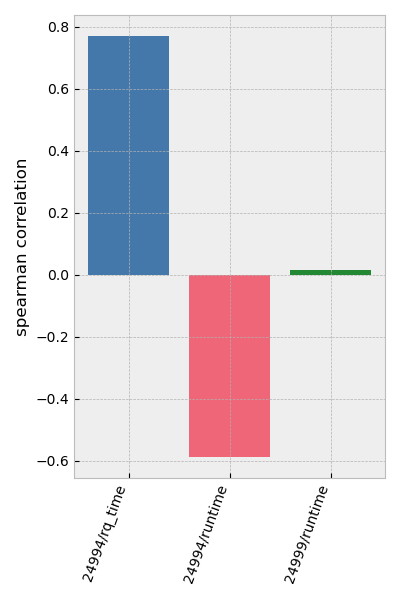

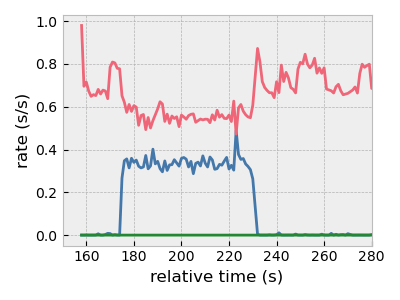

/tmp/ipykernel_7600/518578434.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 3))


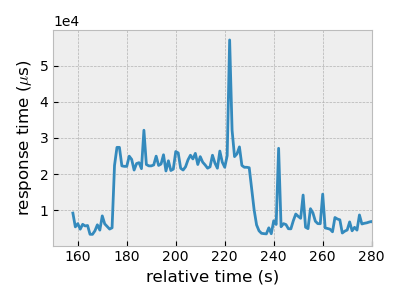

In [312]:
colours = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']

bar.index = [re.sub(r"thread/redis-server/(\d+)/sched/(.*)_rate$", r"\1/\2", col) for col in bar.index]
plt.figure(figsize=(4, 6))
plt.bar(bar.index, bar, color=colours)
plt.ylabel("spearman correlation")
plt.xticks(rotation=70, ha="right")
plt.tight_layout()
plt.savefig("scenario2_bar.pdf")
plt.show()

Y.columns = [re.sub(r"thread/redis-server/(\d+)/sched/(.*)_rate$", r"\1/\2", col) for col in Y.columns]
Y = Y.loc[:, bar.index]
plt.figure(figsize=(4, 3))
for y, colour in zip(Y.columns, colours):
    plt.plot(metrics_view["relative_epoch_s"], Y[y], color=colour)
    plt.xlabel("relative time (s)")
    plt.ylabel("rate (s/s)")
    plt.xlim(LIMITS)
plt.tight_layout()
plt.savefig("scenario2_metrics.pdf")
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(metrics_view["epoch_s"] - metrics["epoch_s"].min(), metrics_view["response_time_us"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.xlabel("relative time (s)")
plt.ylabel("response time ($\mu$s)")
plt.xlim(LIMITS)
plt.tight_layout()
plt.savefig("scenario2_response_time.pdf")
plt.show()